In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [3]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [4]:
s = 44.0
data = data[data[3]==s]
data.head()

,0,1,2,3,4,5,6,7
1836375,2004-02-28,01:06:46.197728,18,44.0,17.7246,40.4666,97.52,2.67532
1836376,2004-02-28,01:07:16.868529,19,44.0,17.6952,40.5004,101.20,2.67532
1836377,2004-02-28,01:09:16.251618,23,44.0,17.6756,40.6355,97.52,2.67532
1836378,2004-02-28,01:09:46.226273,24,44.0,17.6756,40.7706,97.52,2.67532
1836379,2004-02-28,01:10:16.865402,25,44.0,17.6854,40.7368,97.52,2.67532


In [5]:
# print(S1df.shape)
outliersILista = []
outliersIListaV = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersILista.append(i)
        outliersIListaV.append(row[4])
print(data.shape, len(outliersILista))
# Removendo outliers no sensor
passo3= data.copy()
print(passo3.head())
print(passo3.shape)
passo3= passo3.drop(outliersILista)
print(passo3.shape)
passo3.to_csv('sensor.csv')
data = pd.read_csv("sensor.csv")
data.shape
data.drop(['Unnamed: 0'], axis=1,inplace=True)
# data.head(1)
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

(48632, 8) 8435
                  0                1   2     3        4        5       6  \
1836375  2004-02-28  01:06:46.197728  18  44.0  17.7246  40.4666   97.52   
1836376  2004-02-28  01:07:16.868529  19  44.0  17.6952  40.5004  101.20   
1836377  2004-02-28  01:09:16.251618  23  44.0  17.6756  40.6355   97.52   
1836378  2004-02-28  01:09:46.226273  24  44.0  17.6756  40.7706   97.52   
1836379  2004-02-28  01:10:16.865402  25  44.0  17.6854  40.7368   97.52   

               7  
1836375  2.67532  
1836376  2.67532  
1836377  2.67532  
1836378  2.67532  
1836379  2.67532  
(48632, 8)
(40197, 8)
44.0 
             0                1   2     3        4        5       6        7
0  2004-02-28  01:06:46.197728  18  44.0  17.7246  40.4666   97.52  2.67532
1  2004-02-28  01:07:16.868529  19  44.0  17.6952  40.5004  101.20  2.67532
2  2004-02-28  01:09:16.251618  23  44.0  17.6756  40.6355   97.52  2.67532
3  2004-02-28  01:09:46.226273  24  44.0  17.6756  40.7706   97.52  2.67532
4  2

In [6]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()

d = d.sort_values(['0','1'],ascending = [1,1])
d.shape, (d.tail())

((40197, 8),
                 0                1      2     3        4        5     6  \
 24618  2004-03-24    02:06:02.1859  35657  44.0  26.1722  48.8704  0.46   
 24619  2004-03-24  02:06:41.068572  35658  44.0  26.1232  48.8380  0.46   
 24620  2004-03-24  02:07:56.975472  35660  44.0  26.1918  48.7732  0.46   
 24621  2004-03-24  02:09:59.399734  35664  44.0  26.1722  48.7084  0.46   
 37033  2004-04-01  12:17:18.290269  59922  44.0      NaN      NaN   NaN   
 
              7  
 24618  2.28431  
 24619  2.28431  
 24620  2.28431  
 24621  2.28431  
 37033  2.16759  )

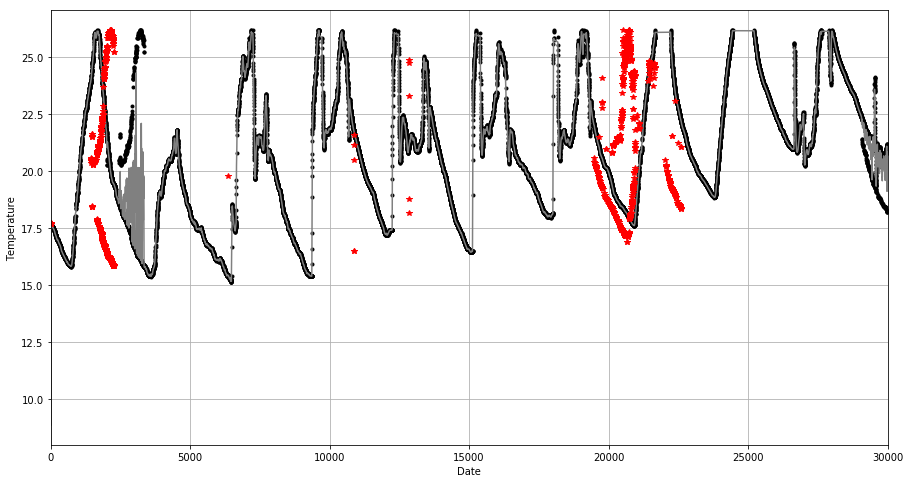

In [7]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")



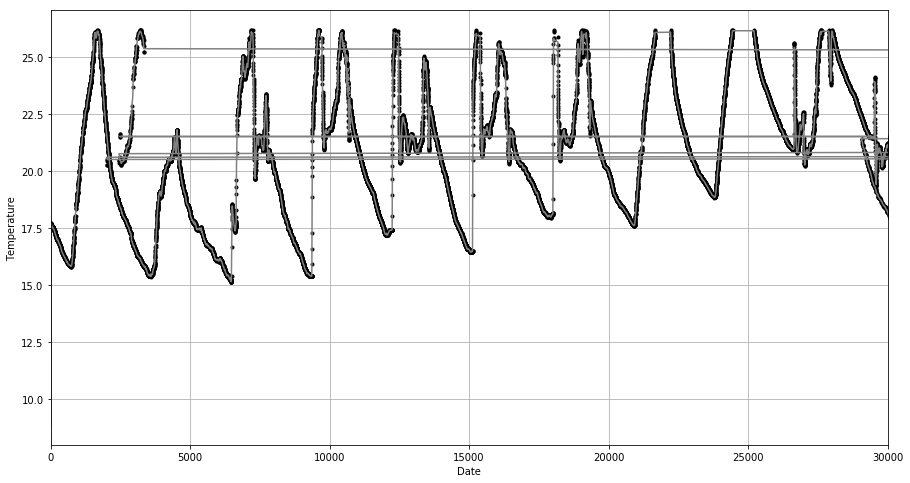

In [8]:
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

In [9]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    print(len(x_anomaly))
    return x_anomaly

x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

524


array([    0,     1,     2,     3,     4,  4114,  4115,  4116,  4117,
        4118,  4119,  4120,  4121,  4122,  4123,  4225,  4226,  4227,
        4228,  4231,  4232,  4233,  4234,  4235,  4236,  4389,  4528,
        6137,  6138,  6139,  6140,  6141,  6142,  6143,  6144,  6145,
        6146,  6147,  6148,  6149,  6150,  6326,  6327,  6339,  6340,
        6712,  6720,  6721,  6729,  6735,  6739,  6741,  6743,  6744,
        6747,  6754,  6795,  6857,  6880,  6911,  6918,  6920,  6942,
        6944,  6970,  6971,  6973,  6974,  6975,  6976,  6977,  6978,
        6979,  6980,  6981,  6982,  6983,  6984,  6985,  6986,  6987,
        6988,  6989,  6990,  6991,  6992,  6993,  6994,  6995,  6996,
        6997,  6999,  7000,  7001,  7002,  7004,  7006,  7007,  7008,
        7009,  7010,  7013,  7014,  7015,  7016,  7017,  7018,  7019,
        7020,  7021,  7022,  7023,  7024,  7025,  7026,  7027,  7028,
        7029,  7030,  7031,  7032,  7033,  7034,  7035,  7036,  7037,
        7038,  7039,

(40197, 8)
(39673, 8)
524


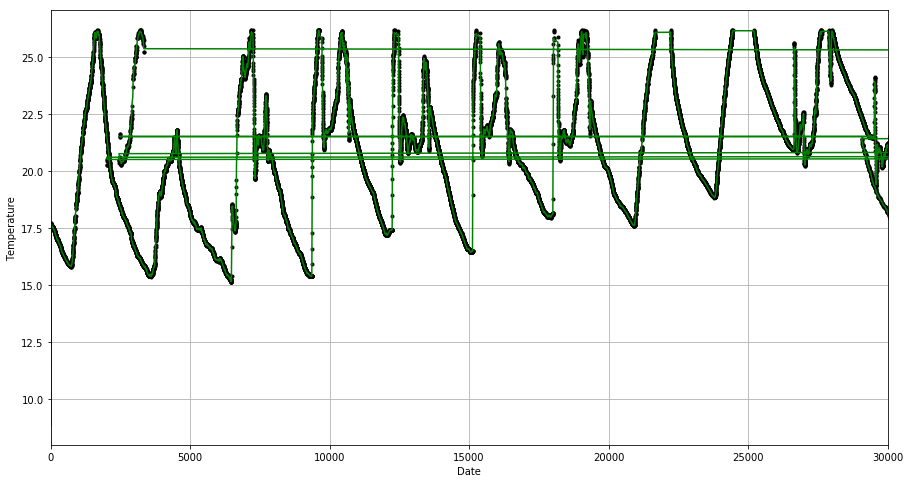

In [12]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

# Depois de ter os dados reconstruídos - verificamos a série temporal

4588


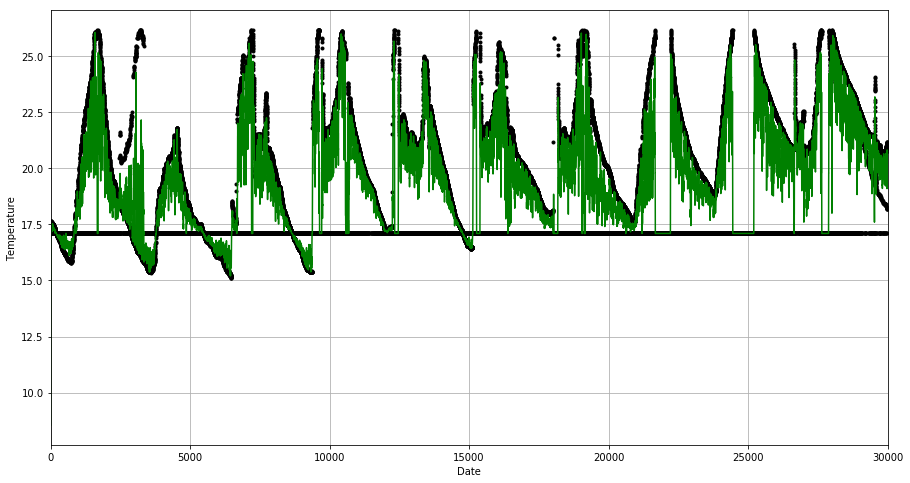

In [23]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")


# Estatísticas Simples

In [13]:
dplot[dplot['Moteid']==s].shape
# Passo 0
sensor = s
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==sensor].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,48632,28.359107,24.082571,21.7132,12.151971


In [14]:
# Passo 1
myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),40197,21.093174,2.55224,21.086,2.086081


In [15]:
    # Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

39673


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,39673,21.074618,2.549359,21.0664,2.082512


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [21]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,19.504476,2.77652,18.538,2.423468


In [22]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )

  Data type   size       mean         SD   median        MAD
0  Raw Data  48632  28.359107  24.082571  21.7132  12.151971
      Data type   size       mean       SD  median       MAD
0  step 1 (BOR)  40197  21.093174  2.55224  21.086  2.086081
     Data type   size       mean        SD   median       MAD
0  step 2 (AOR  39673  21.074618  2.549359  21.0664  2.082512
  Data type   size       mean       SD  median       MAD
0    step 3  65536  19.504476  2.77652  18.538  2.423468


##  Etapa para reconstruir as Épocas que estão faltando

In [16]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)
passoOEp = passoO['2'].tolist()
len(passoOEp)

idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))

25893
65536 39643


In [17]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((40197, 8), int,              1
 2004-02-28  80)

In [18]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
# dfOut.tail(10)


25893


# Gerando o csv para fazer reconstrução dos dados

In [19]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(10)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(65566, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [20]:
final= pd.read_csv('finalsensor.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (65566, 8))